## 기초 준비

### 라이브러리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun GOthic')
plt.rcParams['font.family']

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

### 데이터 읽기

In [3]:
import pandas as pd
import os
display(os.listdir('./origin'))

df_consult = pd.read_excel('./origin/공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx')
df_consult_sheet = pd.ExcelFile('./origin/공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx').sheet_names
for sheet in df_consult_sheet:
    print("df_consult_sheet_name", sheet)
    
df_health = pd.read_excel('./origin/한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx')
df_health_sheet = pd.ExcelFile('./origin/한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx').sheet_names
for sheet in df_health_sheet:
    print("df_health_sheet_name", sheet)
    
df_meal = pd.read_excel('./origin/한국건강증진개발원_보건소 모바일 헬스케어_식사_20230909.xlsx')
df_meal_sheet = pd.ExcelFile('./origin/한국건강증진개발원_보건소 모바일 헬스케어_식사_20230909.xlsx').sheet_names
for sheet in df_meal_sheet:
    print("df_meal_sheet_name", sheet)

df_activity = pd.read_excel('./origin/한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx')
df_activity_sheet = pd.ExcelFile('./origin/한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx').sheet_names
for sheet in df_activity_sheet:
    print("df_exercise_sheet_name", sheet)

['공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx',
 '한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx',
 '한국건강증진개발원_보건소 모바일 헬스케어_식사_20230909.xlsx',
 '한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx']

df_consult_sheet_name 공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자
df_health_sheet_name 한국건강증진개발원_보건소 모바일 헬스케어_미션_20230
df_meal_sheet_name 한국건강증진개발원_보건소 모바일 헬스케어_식사_20230
df_exercise_sheet_name 한국건강증진개발원_보건소 모바일 헬스케어_활동_20230


In [4]:
display(pd.concat([df_consult['성별코드(GENDER_CODE)'], df_consult['성별(GENDER)']], axis=1).notna().sum())
display(pd.concat([df_consult['성별코드(GENDER_CODE)'], df_consult['성별(GENDER)']], axis=1).isna().sum())

성별코드(GENDER_CODE)    477613
성별(GENDER)           477613
dtype: int64

성별코드(GENDER_CODE)    259193
성별(GENDER)           259193
dtype: int64

## 1. 공정거래위원회_소비자 민원학습데이터 온라인 상거래 소비자상담 내역_20201231.xlsx

In [5]:
display(df_consult.shape)
display(df_consult.head())

## 성별
df_consult_gender = pd.concat([df_consult['성별코드(GENDER_CODE)'], df_consult['성별(GENDER)']], axis=1)
# display(df_consult_gender.head())

## 연령
df_consult_age = pd.concat([df_consult['연령대코드(AGE_GROUP_CODE)'], df_consult['연령대(AGE_GROUP_NAME)']], axis=1)
# display(df_consult_age.head())

## 지역
df_consult_region = pd.concat([df_consult['지역코드(AREA_CODE)'], df_consult['지역명(AREA_NAME)']], axis=1)
# display(df_consult_region.head())

## 품목
df_consult_items = pd.concat([df_consult['품목코드(ITEM_CODE)'], df_consult['품목명(ITEM_NAME)']], axis=1)
# display(df_consult_items.head())

## 처리
df_consult_case = pd.concat([ df_consult['사건번호(ACCIDENT_NO)'], df_consult['사건제목(ACCIDENT_TITLE)'], df_consult['처리결과코드(PRCS_RESULT_CODE)'], df_consult['처리결과(PRCS_RESULT)']], axis=1)
# display(df_consult_case.head())

(736806, 13)

,사건번호(ACCIDENT_NO),접수일자(RCPT_YMD),성별코드(GENDER_CODE),성별(GENDER),연령대코드(AGE_GROUP_CODE),연령대(AGE_GROUP_NAME),지역코드(AREA_CODE),지역명(AREA_NAME),품목코드(ITEM_CODE),품목명(ITEM_NAME),사건제목(ACCIDENT_TITLE),처리결과코드(PRCS_RESULT_CODE),처리결과(PRCS_RESULT)
0,2020-0000005,2020-01-01,2.0,여성,5.0,40 - 49세,1403,구미시,350104,항공여객운송서비스,마일리지 사용 제한,502,법.제도설명
1,2020-0000045,2020-01-01,2.0,여성,3.0,20 - 29세,405,부평구,230601,애완견,애초에 계약금도 말도안되었고 계약위반했는데 말에 꼬리에엮고 계약서쓴것도없고 돈 환불...,527,피해구제접수안내
2,2020-0000073,2020-01-01,1.0,남성,5.0,40 - 49세,805,군포시,370499,기타회원권,TLX 패스 이용권,509,기타정보제공
3,2020-0000006,2020-01-01,2.0,여성,6.0,50 - 59세,801,고양시,210201,퍼스널컴퓨터,고지없이 정품 아닌 회사용 윈도우 설치된 회사용 컴 교체후 불편함과 고객센타의 불만...,527,피해구제접수안내
4,2020-0000002,2020-01-01,2.0,여성,4.0,30 - 39세,123,종로구,170402,유아복,(주)씨제이이엠에서 환불을 해주고 있지 않습니다.,527,피해구제접수안내


### 인원 구성 확인

#### 남녀 구성

,성별(GENDER),건수,성별_비율
0,남성,190173,39.82
1,여성,287440,60.18


477613

100.0

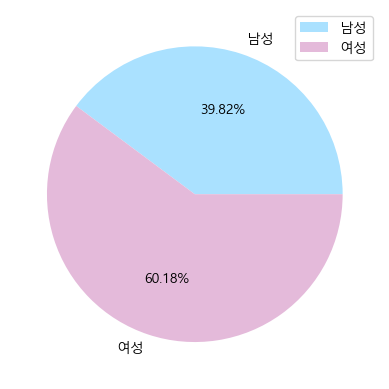

In [36]:
gender_ratio = df_consult.groupby('성별(GENDER)')[['사건번호(ACCIDENT_NO)']].agg({'사건번호(ACCIDENT_NO)':'count'}).reset_index()
gender_ratio['성별_비율'] = round(gender_ratio['사건번호(ACCIDENT_NO)']/gender_ratio['사건번호(ACCIDENT_NO)'].sum()*100,2)
gender_ratio.rename({'사건번호(ACCIDENT_NO)' : '건수'},
                      axis = 1, inplace=True)

display(gender_ratio)
display(gender_ratio['건수'].sum())
display(gender_ratio['성별_비율'].sum())

plt.pie(x = gender_ratio['건수'].values, 
        labels = gender_ratio['성별(GENDER)'].values,
        colors = ['#AAE1FF', '#E4BADA'],
        autopct='%.2f%%')

plt.legend()
plt.show()

#### 연령 구성

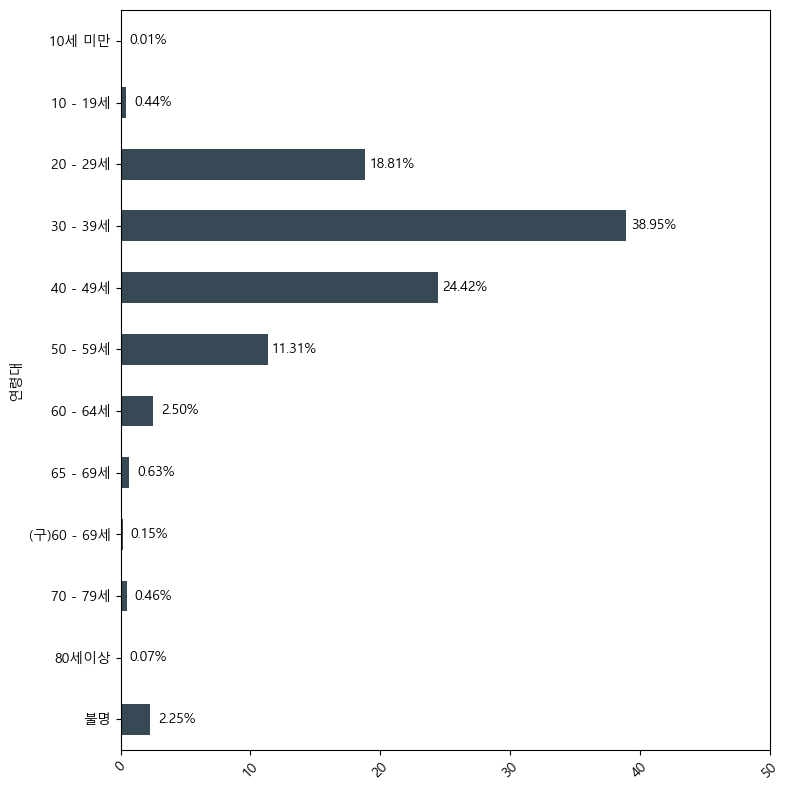

In [100]:
# 연령대 코드 정리
df_age_code = df_consult[['연령대코드(AGE_GROUP_CODE)', '연령대(AGE_GROUP_NAME)']].drop_duplicates(subset='연령대코드(AGE_GROUP_CODE)',
                                                                                                  keep = 'first').dropna()
df_age_code['연령대코드(AGE_GROUP_CODE)'] = df_age_code['연령대코드(AGE_GROUP_CODE)'].astype('int')

# 연령대별 건수 정리 및 연령대 코드 결합
df_age_count = df_consult.groupby(by = '연령대(AGE_GROUP_NAME)')[['사건번호(ACCIDENT_NO)']].agg({'사건번호(ACCIDENT_NO)':'count'}).reset_index()
df_age_count = pd.merge(df_age_count,
                        df_age_code,
                        on = '연령대(AGE_GROUP_NAME)').rename({'사건번호(ACCIDENT_NO)':'건수'}, 
                                                                axis=1)
df_age_count = df_age_count[['연령대코드(AGE_GROUP_CODE)', '연령대(AGE_GROUP_NAME)', '건수']].sort_values(by='연령대코드(AGE_GROUP_CODE)',
                                                                                                        ascending=True).reset_index(drop=True)
df_age_count['연령대_비율'] = round(df_age_count['건수'] / df_age_count['건수'].sum()*100,2)
# display(df_age_count['건수'].sum())
# display(df_age_count['연령대_비율'].sum())
# display(df_age_count)

# 그래프 그리기 위한 준비
df_age_count_graph = df_age_count[['연령대(AGE_GROUP_NAME)', '연령대_비율']].rename({'연령대(AGE_GROUP_NAME)':'연령대'}, axis=1)
df_age_count_graph = df_age_count_graph.set_index('연령대')

# 그래프 순서를 맞추기 위해, 인덱스 순서 조정
new_index_order = ['10세 미만', '10 - 19세', '20 - 29세', '30 - 39세', '40 - 49세', 
                   '50 - 59세', '60 - 64세', '65 - 69세', '(구)60 - 69세', '70 - 79세', '80세이상', '불명']
new_index_order.reverse()
df_age_count_graph = df_age_count_graph.reindex(new_index_order)

# display(df_age_count_graph)
# display(df_age_count_graph.shape)

fig, ax = plt.subplots(figsize=(8,8))
df_age_count_graph.plot.barh(ax = ax, legend=False, color = '#364954')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_x() + p.get_width() + 1, p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', 
                xytext=(10, 0), 
                textcoords='offset points')
plt.xticks(rotation=45)
plt.xlim([0,50])
plt.tight_layout()
plt.show()

In [8]:
df_consult_items_count = pd.merge(df_consult_items['품목명(ITEM_NAME)'].value_counts().to_frame().reset_index(), 
                                  df_consult_items.drop_duplicates(subset='품목명(ITEM_NAME)', keep='first'), 
                                  on = '품목명(ITEM_NAME)', how='left')

df_consult_items_count = df_consult_items_count[['품목명(ITEM_NAME)','품목코드(ITEM_CODE)', 'count']]
df_consult_items_count = df_consult_items_count.sort_values(by='count', ascending=False)
df_consult_items_count

,품목명(ITEM_NAME),품목코드(ITEM_CODE),count
0,기타의류·섬유,179999,36185
1,항공여객운송서비스,350104,28553
2,기타미분류물품,299999,24016
3,국외여행,370102,18769
4,점퍼·재킷류,170301,15962
...,...,...,...
1258,승강설비,241004,1
1259,내과,380204,1
1260,발,150603,1
1261,비료,250401,1


### 남녀에 따른 상품 건수 차이  
- 상품 갯수 순서
    - ['기타의류·섬유', '항공여객운송서비스', '기타미분류물품', '국외여행', '점퍼·재킷류', '기타신발·용품', '기타간편복', '기타숙박시설', '기타미분류서비스', '호텔', '원피스', '운동화', '캐주얼바지',
 '인터넷교육서비스', '모바일게임서비스']
- 남성에게 더 선호되는 상품  
    - ['모바일게임서비스', 'TV', '인터넷정보이용서비스', '시계', '노트북컴퓨터', '스마트폰', '인터넷게임서비스', '투자자문(컨설팅)', '모바일정보이용서비스', '기타스포츠·레저기구·용품', '이동전화서비스', '헤드폰·이어폰', '룸에어컨', '기타컴퓨터·주변기기', '자동차대여(렌트)']
- 여성에서 더 선호되는 상품
    - ['기타의류·섬유', '항공여객운송서비스', '기타미분류물품', '국외여행', '점퍼·재킷류', '기타신발·용품', '기타간편복', '기타숙박시설', '기타미분류서비스', '호텔', '원피스', '운동화', '캐주얼바지', '인터넷교육서비스', '기타보건·위생용품']
- 성별에 따른 차이가 작은 상품  
    - ['선풍기','보조배터리', '전기고데기', '기타교육서비스', '기타부엌소모품', '부업알선', '전집물', '영양보충용제품', '인덕션레인지', '영화관람', '전기자전거', '자료문의', '성기능향상기기', \
    '유산균함유제품','의상대여(렌트)']

In [79]:
df_item_male = df_consult.loc[df_consult['성별(GENDER)']=='남성']['품목명(ITEM_NAME)'].value_counts().to_frame().reset_index().rename({'count':'남성'}, axis=1)
df_item_female = df_consult.loc[df_consult['성별(GENDER)']=='여성']['품목명(ITEM_NAME)'].value_counts().to_frame().reset_index().rename({'count':'여성'}, axis=1)

def merge_all(merge_list, key, how):
    result_df = merge_list[0].copy()
    for i in range(1, len(merge_list)):
        result_df = pd.merge(result_df, merge_list[i], on = key, how = how)
    return result_df

df_item_gender = merge_all([df_consult_items_count, df_item_male, df_item_female], '품목명(ITEM_NAME)', 'left')
df_item_gender['미응답'] = df_item_gender['count'] - df_item_gender['남성'] - df_item_gender['여성']
df_item_gender['남녀차이'] = df_item_gender['남성'] - df_item_gender['여성']
df_item_gender['남녀차이(절대값)'] = abs(df_item_gender['남성'] - df_item_gender['여성'])
# display(df_item_gender.sort_values(by='count', ascending=False).head(15))
df_item_gender.sort_values(by='count', ascending=False).head(15).to_excel('./calculate/temp.xlsx')
# display(list(df_item_gender.head(15)['품목명(ITEM_NAME)']))
# display(df_item_gender.sort_values(by='남녀차이', ascending=False).head(15))
df_item_gender.sort_values(by='남녀차이', ascending=False).head(15).to_excel('./calculate/temp2.xlsx')
# display(list(df_item_gender.loc[df_item_gender['남녀차이'] >0 ].head(15)['품목명(ITEM_NAME)']))
# display(df_item_gender.sort_values(by='남녀차이', ascending=True).head(15))
df_item_gender.sort_values(by='남녀차이', ascending=True).head(15).to_excel('./calculate/temp3.xlsx')
# display(list(df_item_gender.loc[df_item_gender['남녀차이'] <0 ].head(15)['품목명(ITEM_NAME)']))
# display(df_item_gender.loc[(df_item_gender['남녀차이(절대값)'] >10)&((df_item_gender['count'] > 1000))].sort_values(by='남녀차이(절대값)', ascending=True).head(15))
df_item_gender.loc[(df_item_gender['남녀차이(절대값)'] >10)&((df_item_gender['count'] > 1000))].sort_values(by='남녀차이(절대값)', ascending=True).head(15).to_excel('./calculate/temp4.xlsx')



### 사건, 처리결과별 남녀비율의 차이
- 전체적으로 민원 사항이 어떻게 다른가
- 성별로 불만사항이 어떻게 다른가

,사건제목,건수,비율
0,레몬트리)옷 주문 후 배송지연으로 환불 요청,679,22.82
1,[포털][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],634,21.31
2,[포탈][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],451,15.16
3,환불,329,11.06
4,[카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],326,10.96
5,레몬트리) 의류주문 후 미배송에 따른 환불 지연,282,9.48
6,레몬트리 날마다신상 계약불이행,274,9.21


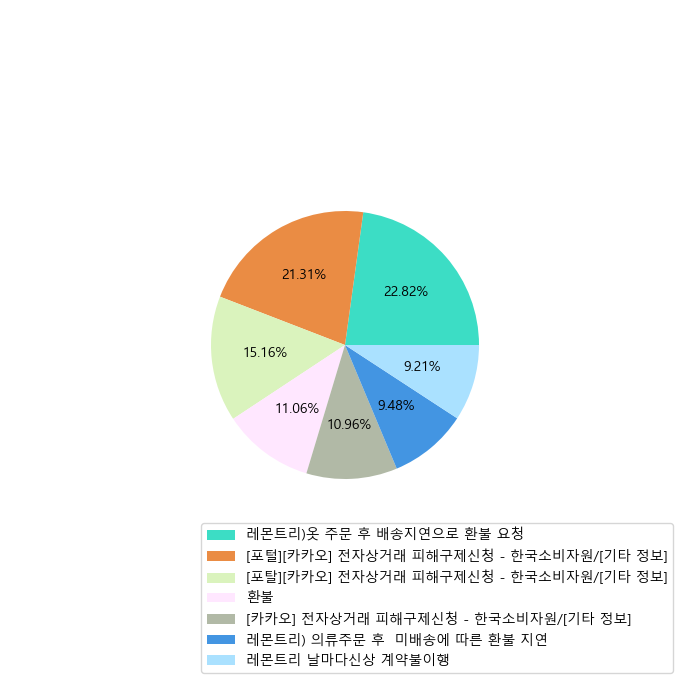

In [10]:
df_consult_count = df_consult.groupby(by='사건제목(ACCIDENT_TITLE)', as_index=False)[['사건번호(ACCIDENT_NO)']].agg({'사건번호(ACCIDENT_NO)':'count'}).sort_values(by='사건번호(ACCIDENT_NO)', ascending=False).head(7)
df_consult_count.rename({'사건제목(ACCIDENT_TITLE)':'사건제목',
                         '사건번호(ACCIDENT_NO)':'건수'},
                        axis=1, inplace=True)
df_consult_count['비율'] = round(df_consult_count['건수'] / df_consult_count['건수'].sum()*100, 2)
df_consult_count = df_consult_count.reset_index(drop=True)
display(df_consult_count)
df_consult_count.to_excel('./calculate/temp.xlsx')

plt.figure(figsize=(7,8))
values = df_consult_count['비율'].values
labels = df_consult_count['사건제목'].values

plt.pie(x=values,
        autopct="%.2f%%",
        colors = ['#3CDDC5', '#EA8C44', '#DAF3BD', '#FFE7FF', '#B1B9A6', 
                  '#4395E2', '#AAE1FF'],
        radius=0.5)
plt.legend(labels, loc='lower right')
plt.tight_layout()
plt.show()

In [11]:
display(pd.crosstab(df_consult.reset_index()['사건제목(ACCIDENT_TITLE)'], ## 남성들의 민원
            df_consult.reset_index()['성별(GENDER)']).sort_values(by='남성', ascending=False).head(15))

display(pd.crosstab(df_consult.reset_index()['사건제목(ACCIDENT_TITLE)'], ## 여성들의 민원
            df_consult.reset_index()['성별(GENDER)']).sort_values(by='여성', ascending=False).head(15))

## 저장하기
pd.crosstab(df_consult.reset_index()['사건제목(ACCIDENT_TITLE)'], ## 남성들의 민원
            df_consult.reset_index()['성별(GENDER)']).sort_values(by='남성', ascending=False).head(10).to_excel('./calculate/temp2.xlsx')

pd.crosstab(df_consult.reset_index()['사건제목(ACCIDENT_TITLE)'], ## 여성들의 민원
            df_consult.reset_index()['성별(GENDER)']).sort_values(by='여성', ascending=False).head(10).to_excel('./calculate/temp3.xlsx')


성별(GENDER),남성,여성
사건제목(ACCIDENT_TITLE),,
[포털][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],113,449
사업자 상담,65,54
환불,60,121
안녕하세요,58,65
[카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],54,193
환불거부,49,78
레몬트리) 의류주문 후 미배송에 따른 환불 지연,45,237
[포탈][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],43,126
문의드립니다.,43,79


성별(GENDER),남성,여성
사건제목(ACCIDENT_TITLE),,
레몬트리)옷 주문 후 배송지연으로 환불 요청,10,669
[포털][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],113,449
레몬트리 날마다신상 계약불이행,9,265
레몬트리) 의류 주문 후 배송 지연으로 환불 요청,6,264
레몬트리) 의류주문 후 미배송에 따른 환불 지연,45,237
[카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],54,193
[포탈][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],43,126
환불,60,121
소비자원 사칭 스미싱,29,102


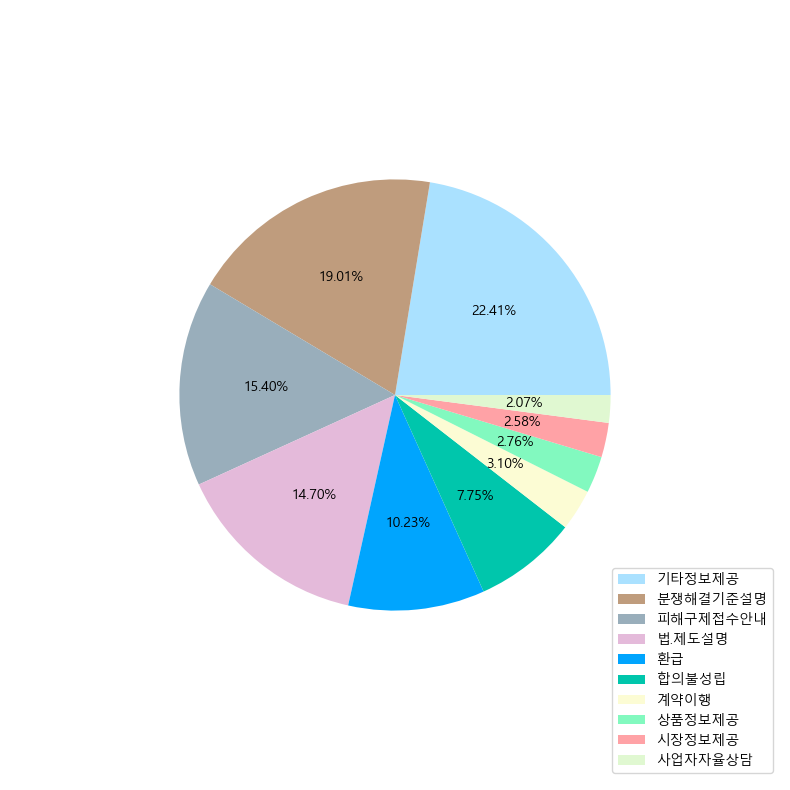

In [103]:
# display(df_consult['처리결과(PRCS_RESULT)'].value_counts().to_frame().reset_index().head(10).rename({"처리결과(PRCS_RESULT)" : "처리결과"}, axis=1))
df_cosult_graph = df_consult['처리결과(PRCS_RESULT)'].value_counts().to_frame().reset_index().head(10).rename({"처리결과(PRCS_RESULT)" : "처리결과"}, axis=1)
df_cosult_graph['비율(%)'] = round(df_cosult_graph['count'] / df_cosult_graph['count'].sum() * 100,2 )
df_cosult_graph.rename({'count':'건수'}, axis=1, inplace=True)
# display(df_cosult_graph['건수'].sum())
# display(df_cosult_graph['비율(%)'].sum())
# display(df_cosult_graph)
df_cosult_graph.to_excel('./calculate/temp.xlsx')

plt.figure(figsize=(10,10))
plt.pie(
    x = df_cosult_graph['비율(%)'].values,
    # labels = df_cosult_graph['처리결과'].values,
    colors = ['#AAE1FF', '#BF9C7D', '#99AEBB', '#E4BADA', '#00A5FE', 
                  '#00C6AC', '#FCFCD4', '#82F9BF', '#FFA2A6', '#E0F8D1'],
    radius=0.7,
    autopct = '%.2f%%'
)

plt.legend(df_cosult_graph['처리결과'].values, loc='lower right')

plt.show()

In [13]:
def item_analysis(origin, category, analysis_key, merge_key, merge_df):
    result_df = merge_df.copy()
    for i in category:
        temp_df = origin.loc[ origin[analysis_key] == i ][merge_key].value_counts().to_frame().reset_index().rename({'count': i}, axis=1)
        result_df = pd.merge(result_df, 
                             temp_df, 
                             on=merge_key, how='left')
    return result_df

df_item_gender_prcs = item_analysis(origin = df_consult, 
                                    category= list(set(df_consult['처리결과(PRCS_RESULT)'])), 
                                    analysis_key= '처리결과(PRCS_RESULT)', 
                                    merge_key= '품목명(ITEM_NAME)', 
                                    merge_df = df_item_gender )
df_item_gender_prcs

,품목명(ITEM_NAME),품목코드(ITEM_CODE),count,남성,여성,미응답,남녀차이,남녀차이(절대값),교환,시장정보제공,...,법.제도설명,분쟁해결기준설명,피해구제접수안내,배상,반려(권익위 등),비 소비자상담처리,타기관알선.이관,상품정보제공,취하.중지,처리불능
0,기타의류·섬유,179999,36185,4444.0,16629.0,15112.0,-12185.0,12185.0,269.0,810.0,...,5926.0,4401.0,3547.0,131.0,2.0,526.0,284.0,893.0,351.0,1020.0
1,항공여객운송서비스,350104,28553,8588.0,10906.0,9059.0,-2318.0,2318.0,21.0,720.0,...,3724.0,5776.0,6247.0,108.0,1.0,31.0,88.0,739.0,202.0,206.0
2,기타미분류물품,299999,24016,6097.0,7341.0,10578.0,-1244.0,1244.0,237.0,913.0,...,3167.0,3085.0,1984.0,139.0,6.0,746.0,204.0,607.0,180.0,298.0
3,국외여행,370102,18769,4752.0,7597.0,6420.0,-2845.0,2845.0,10.0,448.0,...,1759.0,6695.0,2705.0,135.0,2.0,49.0,67.0,527.0,147.0,99.0
4,점퍼·재킷류,170301,15962,3033.0,7514.0,5415.0,-4481.0,4481.0,150.0,299.0,...,2789.0,1666.0,1930.0,101.0,1.0,136.0,104.0,285.0,159.0,398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,승강설비,241004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1288,내과,380204,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,발,150603,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1290,비료,250401,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def check_df(df, check_col, check_list, sort_key=False): # 데이터프레임에서 원하는 항목에 대한 정보를 확인하고, 필요하면 내림차순으로 정보를 확인
    result_df = df[check_list + check_col]
    
    if sort_key != False:
        result_df = result_df.sort_values(by=sort_key, ascending=False)
    return result_df
    
check_df(df_item_gender_prcs, 
         check_col = ['기타정보제공'], 
         check_list = ['품목명(ITEM_NAME)','품목코드(ITEM_CODE)', 'count', '남성', '여성', '미응답', '남녀차이'], 
         sort_key = '기타정보제공')

# check_df(df_item_gender_prcs, 
#          check_col = ['분쟁해결기준설명'], 
#          check_list = ['품목명(ITEM_NAME)','품목코드(ITEM_CODE)', 'count', '남성', '여성', '미응답', '남녀차이'], 
#          sort_key = '분쟁해결기준설명')

,품목명(ITEM_NAME),품목코드(ITEM_CODE),count,남성,여성,미응답,남녀차이,기타정보제공
0,기타의류·섬유,179999,36185,4444.0,16629.0,15112.0,-12185.0,9071.0
2,기타미분류물품,299999,24016,6097.0,7341.0,10578.0,-1244.0,7547.0
8,기타미분류서비스,499993,13398,3673.0,4838.0,4887.0,-1165.0,5681.0
1,항공여객운송서비스,350104,28553,8588.0,10906.0,9059.0,-2318.0,5548.0
14,모바일게임서비스,360408,9676,4272.0,1838.0,3566.0,2434.0,4125.0
...,...,...,...,...,...,...,...,...
1281,베타카로틴함유제품,111349,1,NaN,NaN,NaN,NaN,NaN
1283,신경외과,380205,1,NaN,NaN,NaN,NaN,NaN
1285,유치원,410101,1,NaN,NaN,NaN,NaN,NaN
1286,펜치,150503,1,NaN,NaN,NaN,NaN,NaN


### WordCloud 작성

In [15]:
# display(df_consult_case['사건제목(ACCIDENT_TITLE)'].value_counts().to_frame().reset_index().head(20))

# display(df_consult_case['처리결과(PRCS_RESULT)'].value_counts().to_frame().reset_index().head(20))

word_sentence = " ".join(df_consult_case['사건제목(ACCIDENT_TITLE)'].astype(str).values) # 데이터프레임에서 문자열을 추출하여 단일 문자열로 결합

with open('./wordCloud/word_sentence.txt', 'w', encoding='utf-8') as file: # 텍스트 파일로 저장
    file.write(word_sentence)

In [16]:
# 텍스트 파일 읽기
with open('./wordCloud/word_sentence.txt', 'r', encoding='utf-8') as file:
    read_word_sentence = file.read()

# print(read_word_sentence)

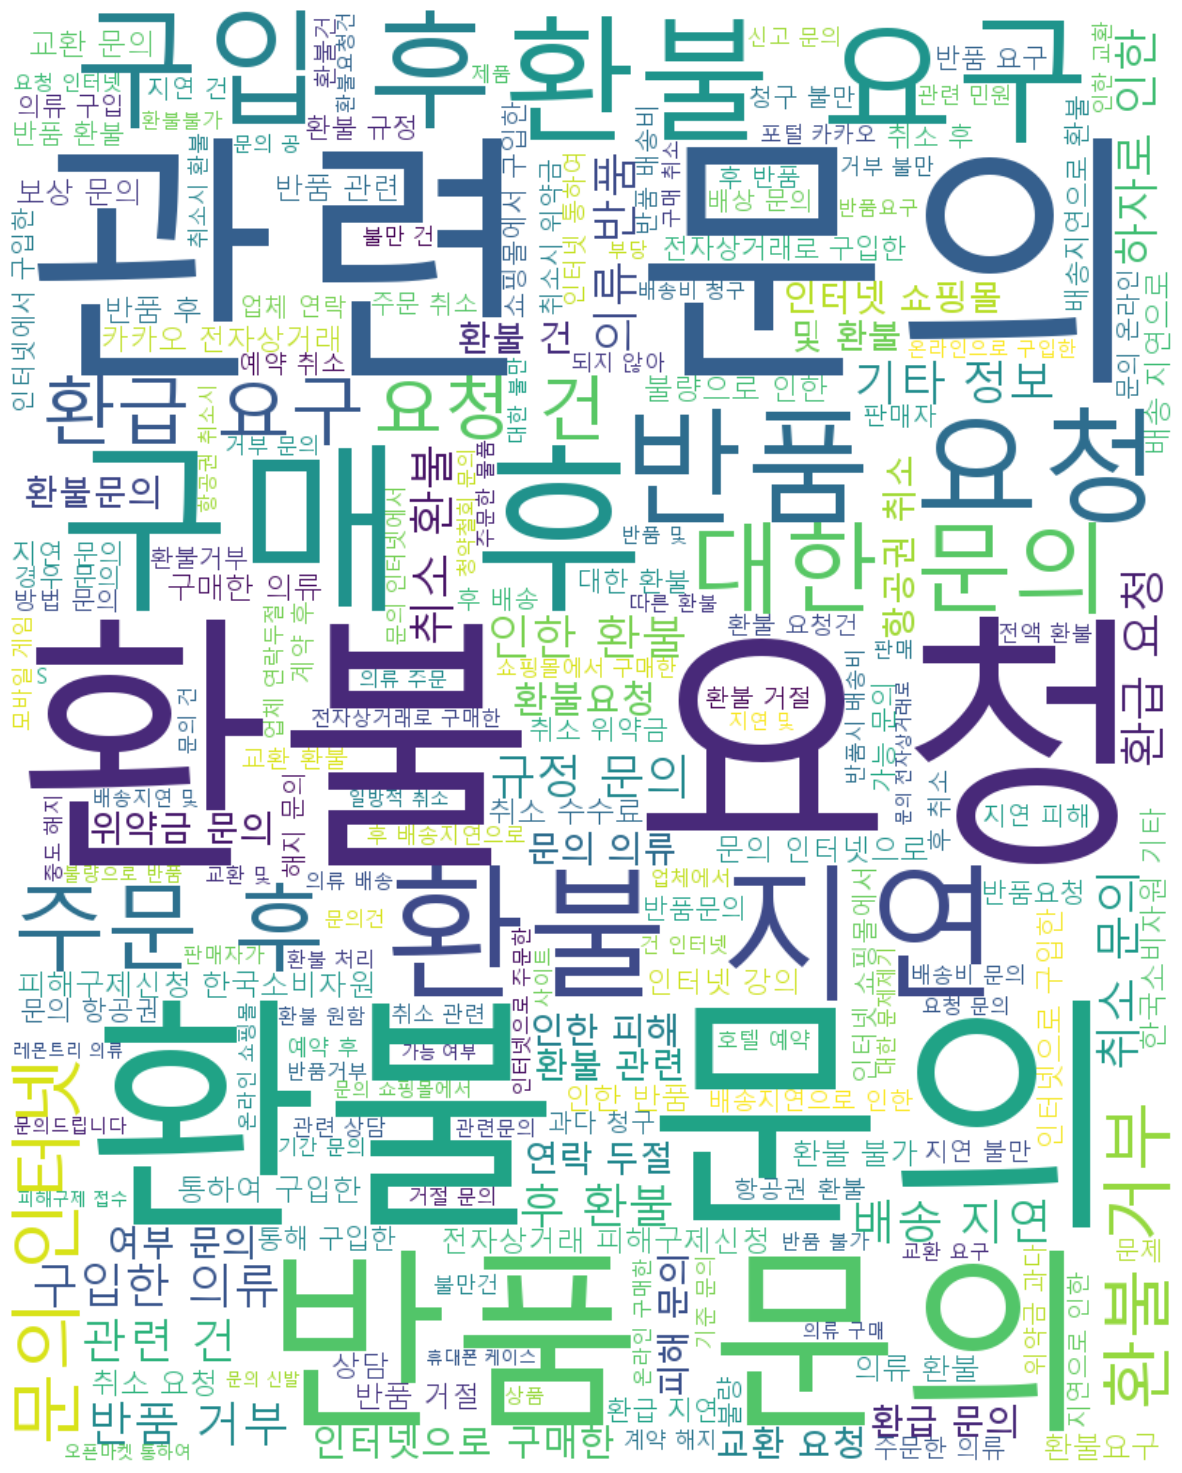

In [17]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun GOthic')
plt.rcParams['font.family']

# 불용어 리스트
stopwords = ['의', '가', '이', '은', '는', '을', '를', '에', '와', '한', '하다']

# 불용어 제거 함수
def remove_stopwords(text, stopwords):
    pattern = re.compile(r'\b(' + '|'.join(stopwords) + r')\b\s*')
    return pattern.sub('', text)

# 불용어 제거
cleaned_text = remove_stopwords(read_word_sentence, stopwords)

# display(cleaned_text)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='malgun', width=800, height=1000, background_color='white').generate(cleaned_text)

# 워드 클라우드 시각화
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [18]:
display(df_consult['사건제목(ACCIDENT_TITLE)'].value_counts().to_frame().reset_index().head(20))
df_consult['사건제목(ACCIDENT_TITLE)'].value_counts().to_frame().reset_index().head(20).to_excel('./calculate/temp.xlsx', index=True)

,사건제목(ACCIDENT_TITLE),count
0,레몬트리)옷 주문 후 배송지연으로 환불 요청,679
1,[포털][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],634
2,[포탈][카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],451
3,환불,329
4,[카카오] 전자상거래 피해구제신청 - 한국소비자원/[기타 정보],326
5,레몬트리) 의류주문 후 미배송에 따른 환불 지연,282
6,레몬트리 날마다신상 계약불이행,274
7,레몬트리) 의류 주문 후 배송 지연으로 환불 요청,270
8,안녕하세요,215
9,문의드립니다.,213


In [19]:
df_consult_age_Count = pd.merge(df_consult_age['연령대코드(AGE_GROUP_CODE)'].value_counts().sort_index().to_frame().reset_index(),
                                df_consult_age.drop_duplicates(subset = '연령대코드(AGE_GROUP_CODE)', keep='first').sort_values(by='연령대코드(AGE_GROUP_CODE)', ascending=True),
                                on = '연령대코드(AGE_GROUP_CODE)', how='left')

df_consult_age_Count = df_consult_age_Count[['연령대코드(AGE_GROUP_CODE)', '연령대(AGE_GROUP_NAME)', 'count']]
display(df_consult_age_Count)

,연령대코드(AGE_GROUP_CODE),연령대(AGE_GROUP_NAME),count
0,1.0,10세 미만,52
1,2.0,10 - 19세,3126
2,3.0,20 - 29세,132289
3,4.0,30 - 39세,273861
4,5.0,40 - 49세,171745
5,6.0,50 - 59세,79545
6,7.0,(구)60 - 69세,1030
7,8.0,70 - 79세,3217
8,9.0,불명,15796
9,10.0,80세이상,493


- 환불, 반품에 대한 키워드가 많은 것으로 보임

## 2. 한국건강증진개발원_보건소 모바일 헬스케어_미션_20230912.xlsx

,미션명,점수합계,미션횟수
0,활동량) 활동량계 업데이트,1110,1109
1,영양) 식생활 미션 실천여부 확인,990,990
3,SNS) 게시판 댓글 달기,970,902
4,영양) 식사일기 등록,811,811
5,신체활동) 운동일기 등록,716,716
2,모바일 건강상담) 월간리포트(건강집중상담) 확인,980,193
6,모바일 건강상담) 신체활동 집중상담 확인,685,130
7,모바일 건강상담) 영양 집중상담 확인,460,85
8,영양) 식사사진 등록,64,64


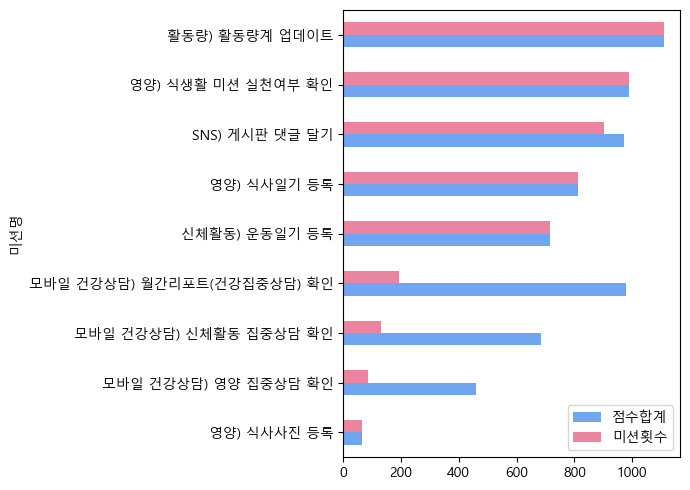

In [98]:
def column_analysis(origin_df, key_col, select_col, calculate_col, agg, new_col_name):
    result_df = pd.DataFrame({})
    result_df = origin_df[select_col].groupby(by=key_col, as_index=False).agg({calculate_col:agg}).sort_values(by=calculate_col, ascending=False).rename({calculate_col:new_col_name}, axis=1)
    return  result_df

df_health_sum = column_analysis(origin_df = df_health,
                select_col = ['미션명','미션점수'],
                key_col = '미션명',
                calculate_col= '미션점수',
                agg = 'sum',
                new_col_name = '점수합계')

df_health_count = column_analysis(origin_df = df_health,
                select_col = ['미션명','미션점수'],
                key_col = '미션명',
                calculate_col= '미션점수',
                agg = 'count',
                new_col_name = '미션횟수')

display(pd.merge(df_health_sum, df_health_count, on = '미션명', how='left').sort_values(by='미션횟수', ascending=False))
df_health_merge = pd.merge(df_health_sum, df_health_count, on = '미션명', how='left').sort_values(by='미션횟수', ascending=True)
pd.merge(df_health_sum, df_health_count, on = '미션명', how='left').sort_values(by='미션횟수', ascending=False).to_excel('./calculate/temp.xlsx', index=True)

df_health_merge.set_index('미션명').plot(kind='barh',
                                    color = ['#70A5EF','#EB849F' ],
                                    figsize=(7,5))
plt.tight_layout()
plt.show()


- "모바일 건강상담) 영양 집중상담 확인", "영양) 식사사진 등록"은 항목들 중에서 미션횟수가 유일하게 두 자리수로 집계되어 매우 낮은 모습  

- 상담) 종류의 미션은 점수가 높음에도 불구하고 수행횟수가 적음

- "활동량) 활동량계 업데이트"는 목록 중에서 유일하게 천 단위로 매우 높은 모습을 

- 미션마다 점수가 크게 다름을 확인 가능

## 3. 한국건강증진개발원_보건소 모바일 헬스케어_식사_20230912.xlsx

In [21]:
display(df_meal.head())
display(df_meal.columns)

display(df_meal['식사일시'].max())
display(df_meal['식사일시'].min())

df_meal_diet = df_meal['끼니구분'].value_counts().to_frame().reset_index()
df_meal_diet['ratio'] = round(df_meal_diet['count']/df_meal_diet['count'].sum()*100,2)
display(df_meal_diet)

,식사일시,칼로리,끼니구분
0,2023-09-09,215.40,점심
1,2023-09-09,271.05,점심
2,2023-09-09,228.01,점심
3,2023-09-09,98.93,점심
4,2023-09-09,15.00,점심


Index(['식사일시', '칼로리', '끼니구분'], dtype='object')

Timestamp('2023-09-09 00:00:00')

Timestamp('2023-09-01 00:00:00')

,끼니구분,count,ratio
0,점심,9822,32.74
1,아침,8601,28.67
2,저녁,8028,26.76
3,점심간식,1726,5.75
4,아침간식,1095,3.65
5,저녁간식,728,2.43


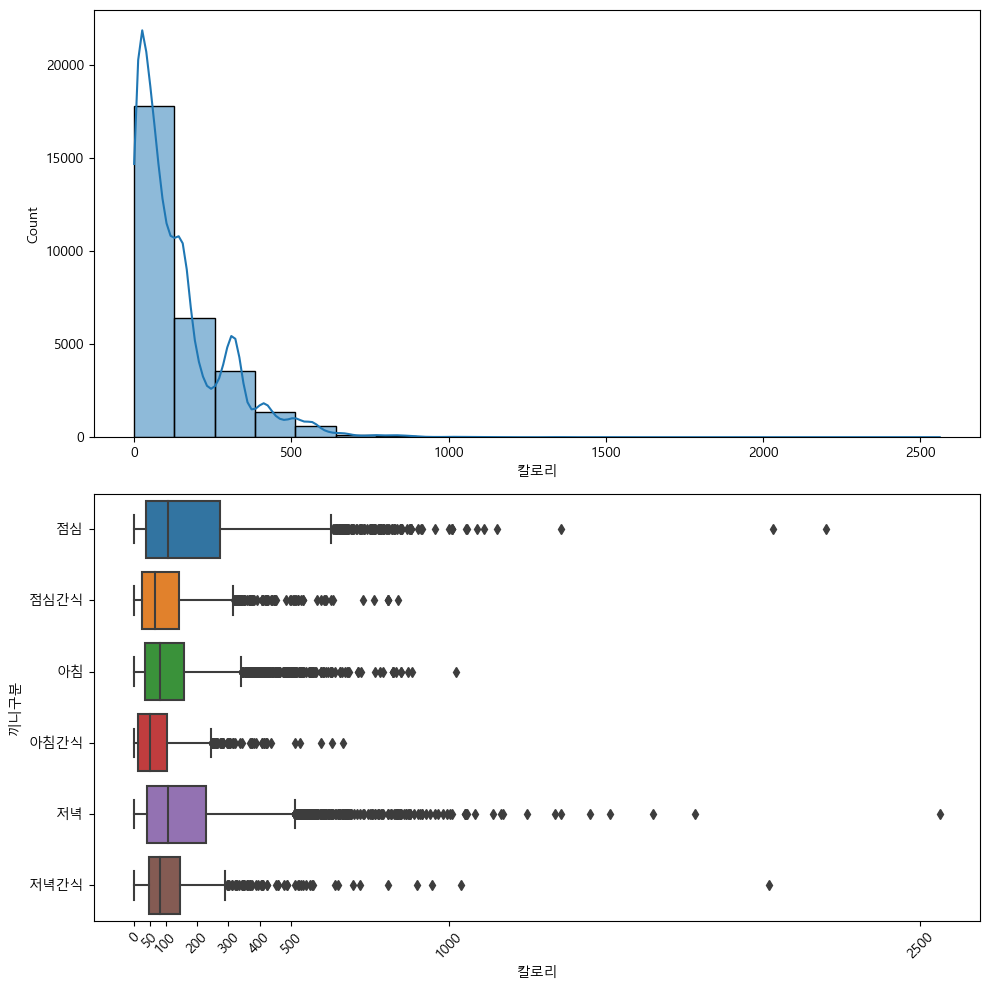

In [140]:
# display(df_meal.describe())
df_meal.describe().to_excel('./calculate/temp.xlsx', index=True)

# plt.figure(figsize=(10,5))
fig, axes = plt.subplots(2,1, figsize = (10,10))
sns.histplot(df_meal['칼로리'], bins=20,kde=True, ax = axes[0])
plt.xticks([0, 50, 100, 200, 300, 400, 500, 1000, 2500], rotation=45)

sns.boxplot(y='끼니구분', x='칼로리', data=df_meal, ax=axes[1])

plt.tight_layout()
plt.show()

,식사일시,건수
0,2023-09-01,3846
1,2023-09-02,2303
2,2023-09-03,3284
3,2023-09-04,3769
4,2023-09-05,3479
5,2023-09-06,2684
6,2023-09-07,3715
7,2023-09-08,4637
8,2023-09-09,2283


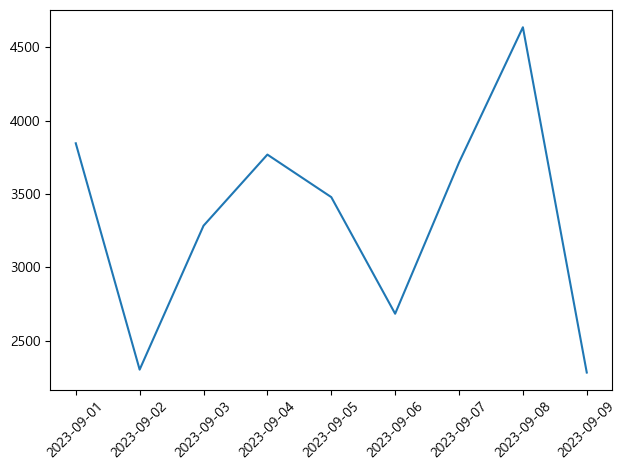

In [138]:
df_meal_graph = df_meal.reset_index().groupby('식사일시')[['index']].agg({'index':'count'}).reset_index().rename({'index':'건수'}, axis=1)
display(df_meal_graph)
plt.plot(df_meal_graph['식사일시'],
         df_meal_graph['건수'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 0~100[kcal] 구간에 데이터가 많이 쏠려있음  

- 점심과 저녁에 칼로리가 높은 편

## 4. 한국건강증진개발원_보건소 모바일 헬스케어_활동_20230912.xlsx

In [23]:
# display(df_activity.head())
display(df_activity.columns)
display(df_activity.shape)

df_activity['최종_수정_일시_연도'] = df_activity['최종_수정_일시'].dt.year
df_activity['최종_수정_일시_연도_월'] = df_activity['최종_수정_일시'].dt.strftime('%Y-%m')

display(df_activity)
display(df_activity['최종_수정_일시'].max())
display(df_activity['최종_수정_일시'].min())

df_activity_numeric = df_activity[['최종_수정_일시', '최종_수정_일시_연도', '최종_수정_일시_연도_월', '안전_목표_심박수', '상담_차수', '하루활동칼로리', '하루활동시간', '활동유효한계']]
df_activity_numeric

Index(['상담_순번', '안전_목표_심박수', '최종_수정_일시', '상담_차수', '활동_처방_구분', '하루활동칼로리',
       '하루활동시간', '활동유효한계'],
      dtype='object')

(4234, 8)

,상담_순번,안전_목표_심박수,최종_수정_일시,상담_차수,활동_처방_구분,하루활동칼로리,하루활동시간,활동유효한계,최종_수정_일시_연도,최종_수정_일시_연도_월
0,7245111,144,2023-09-12,3,설문,230,30,50,2023,2023-09
1,7476478,137,2023-09-12,1,설문,357,43,60,2023,2023-09
2,6282740,139,2023-09-12,6,설문,450,65,65,2023,2023-09
3,7314038,141,2023-09-12,3,설문,370,73,65,2023,2023-09
4,6364313,123,2023-09-12,6,설문,334,43,60,2023,2023-09
...,...,...,...,...,...,...,...,...,...,...
4229,7055425,109,2023-09-01,3,설문,144,30,60,2023,2023-09
4230,7086745,131,2023-09-01,3,설문,227,48,60,2023,2023-09
4231,7123032,130,2023-09-01,3,설문,302,48,60,2023,2023-09
4232,7065612,117,2023-09-01,3,설문,208,48,60,2023,2023-09


Timestamp('2023-09-12 00:00:00')

Timestamp('2023-09-01 00:00:00')

,최종_수정_일시,최종_수정_일시_연도,최종_수정_일시_연도_월,안전_목표_심박수,상담_차수,하루활동칼로리,하루활동시간,활동유효한계
0,2023-09-12,2023,2023-09,144,3,230,30,50
1,2023-09-12,2023,2023-09,137,1,357,43,60
2,2023-09-12,2023,2023-09,139,6,450,65,65
3,2023-09-12,2023,2023-09,141,3,370,73,65
4,2023-09-12,2023,2023-09,123,6,334,43,60
...,...,...,...,...,...,...,...,...
4229,2023-09-01,2023,2023-09,109,3,144,30,60
4230,2023-09-01,2023,2023-09,131,3,227,48,60
4231,2023-09-01,2023,2023-09,130,3,302,48,60
4232,2023-09-01,2023,2023-09,117,3,208,48,60


In [24]:
df_activity['활동_처방_구분'].unique()

array(['설문', '체력'], dtype=object)

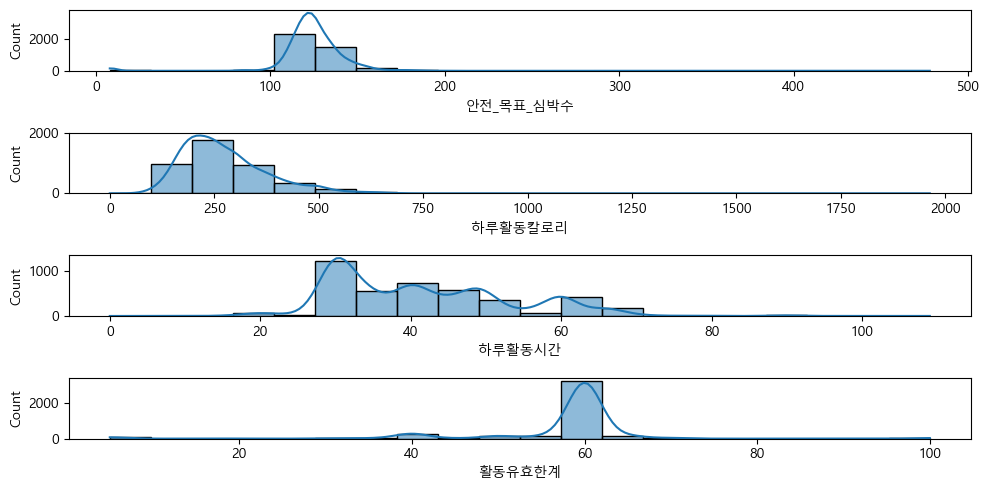

In [25]:
fig, axes = plt.subplots(4, 1, figsize=(10, 5))

sns.histplot(df_activity['안전_목표_심박수'], ax=axes[0], bins = 20, kde=True)
sns.histplot(df_activity['하루활동칼로리'], ax=axes[1], bins = 20, kde=True)
sns.histplot(df_activity['하루활동시간'], ax=axes[2], bins = 20, kde = True)
sns.histplot(df_activity['활동유효한계'], ax=axes[3], bins = 20, kde=True)

plt.tight_layout()
plt.show()